# Flipkart Headphones Dataset


### This dataset containing details of various headphones products in India scraped from an e-commerce website 'Flipkart.com'. This dataset has 1000 samples with 7 attributes.

- Attributes.
- Title of the headphone product (title)
- Color of the headphone product (color)
- Type of the headphone product (type)
- Average rating of the product (avg_rating)
- Number of ratings available (num_of_ratings)
- Selling price of the headphone at the time of scraping (selling_price) 
- Maximum Retail Price (MRP)

### Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from wordcloud import WordCloud, STOPWORDS


In [2]:
#Importing the dataset
df =pd.read_csv("../input/flipkart-headphones-dataset/flipkart_headphones.csv")

In [3]:
# look  data set
df.head()

,title,color,type,avg_rating,num_of_ratings,selling_price,MRP
0,Wings Phantom Pro Gaming TWS with 30 Hrs Playt...,Black,True Wireless,4.0,1934,2493,5499
1,Boult Audio ProBass Curve Neckband Bluetooth H...,Blue,Black,4.0,333036,799,3499
2,Aroma NB120 Tehalka - 28 Hours Playtime Blueto...,Black,In the Ear,3.9,10398,379,1999
3,N2B MAGNET Red & k1 Pack of 2 Bluetooth Blueto...,Black,Red,3.5,20079,260,1875
4,OnePlus Bullets Wireless Z Bass Edition Blueto...,Bold Black,In the Ear,4.3,437395,1999,2190


In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1000 non-null   object 
 1   color           1000 non-null   object 
 2   type            1000 non-null   object 
 3   avg_rating      1000 non-null   float64
 4   num_of_ratings  1000 non-null   int64  
 5   selling_price   1000 non-null   int64  
 6   MRP             1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [5]:
#checking null value 
df.isna().sum()

title             0
color             0
type              0
avg_rating        0
num_of_ratings    0
selling_price     0
MRP               0
dtype: int64

In [6]:
# look  describe data set
df.describe().round(2)

,avg_rating,num_of_ratings,selling_price,MRP
count,1000.00,1000.00,1000.00,1000.00
mean,3.83,50040.75,832.88,2423.04
std,0.47,157229.70,812.54,1774.03
min,1.00,0.00,88.00,0.00
25%,3.60,116.75,349.00,1079.75
50%,3.90,1712.00,599.00,1999.00
75%,4.00,13327.00,999.00,2999.00
max,5.00,1299042.00,7990.00,16999.00


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

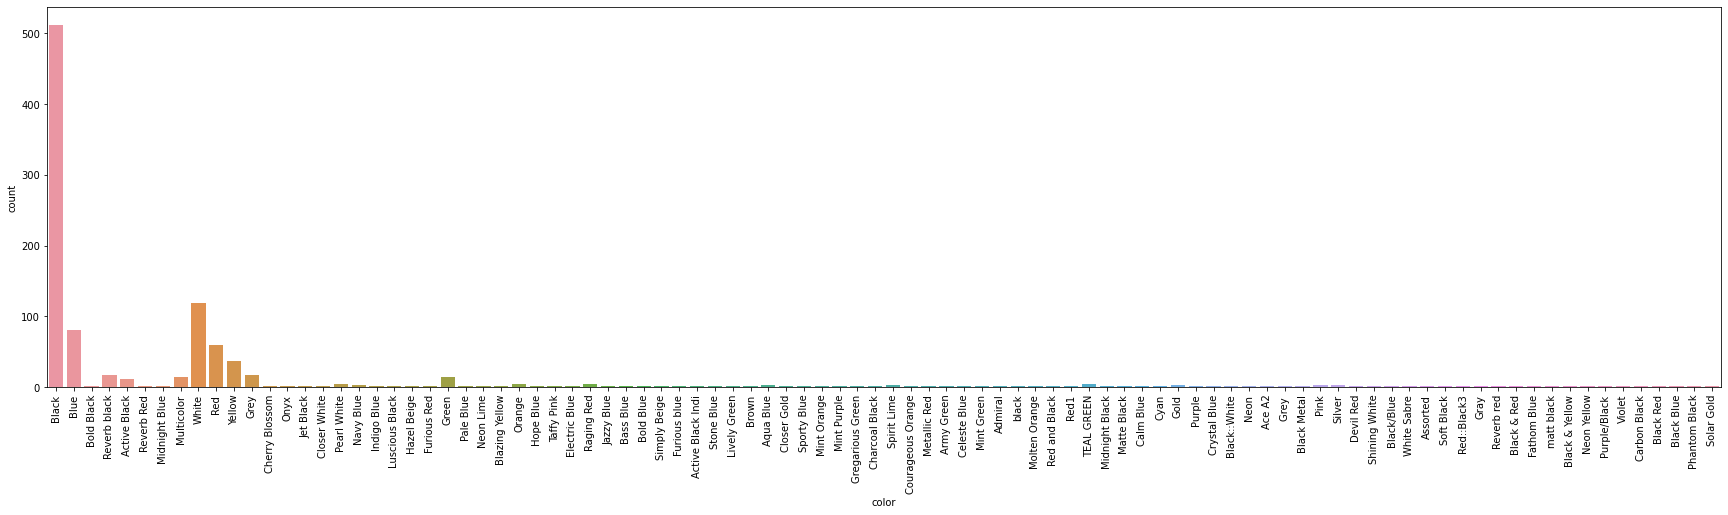

In [7]:
plt.figure(figsize=(30,7))
sns.countplot(df['color'])
plt.xticks(rotation=90)
plt.show

# we see the high sale Headphone that color [ Black then White and Red ,Yellow Blue ]

In [8]:
df["color"].value_counts(normalize=True).head(5)

Black     0.512
White     0.119
Blue      0.081
Red       0.059
Yellow    0.037
Name: color, dtype: float64

In [9]:
df["type"].value_counts(normalize=True)

 In the Ear       0.459
 True Wireless    0.314
 On the Ear       0.083
 Black            0.059
 Grey             0.026
 White            0.023
 Yellow           0.011
 Silver           0.007
 Red              0.006
 Multicolor       0.003
 Steel            0.002
 Blue             0.002
 black            0.002
Yellow            0.001
Black             0.001
 Gold             0.001
Name: type, dtype: float64

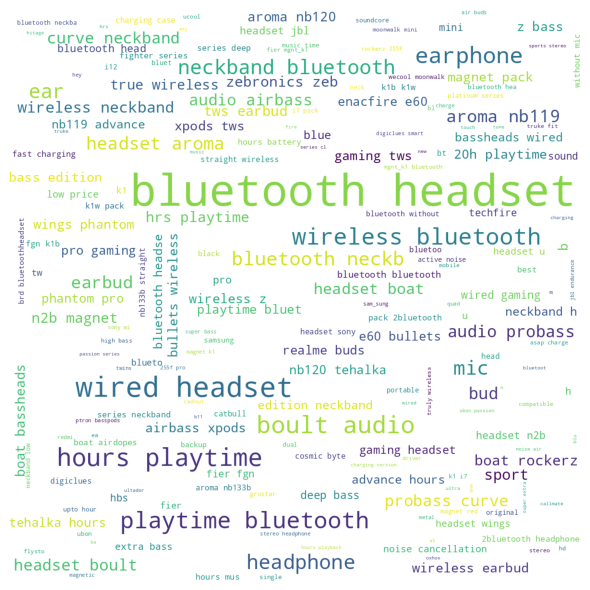

In [10]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## This most frequent words in the title

In [11]:
# Now we made DataFrame that famous 5 colors , this 5 colors equals 80 % of data set
df_color=df[(df["color"]=="Black") |(df["color"]=="White")|(df["color"]=='Blue') |(df["color"]=='Red')|(df["color"]=='Yellow')]
print ("New DataFrame  ",df_color.shape)
print ("Original DataFrame  ",df.shape)

New DataFrame   (808, 7)
Original DataFrame   (1000, 7)


In [12]:
df_color.head()

,title,color,type,avg_rating,num_of_ratings,selling_price,MRP
0,Wings Phantom Pro Gaming TWS with 30 Hrs Playt...,Black,True Wireless,4.0,1934,2493,5499
1,Boult Audio ProBass Curve Neckband Bluetooth H...,Blue,Black,4.0,333036,799,3499
2,Aroma NB120 Tehalka - 28 Hours Playtime Blueto...,Black,In the Ear,3.9,10398,379,1999
3,N2B MAGNET Red & k1 Pack of 2 Bluetooth Blueto...,Black,Red,3.5,20079,260,1875
5,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,Black,In the Ear,4.0,29426,459,1499


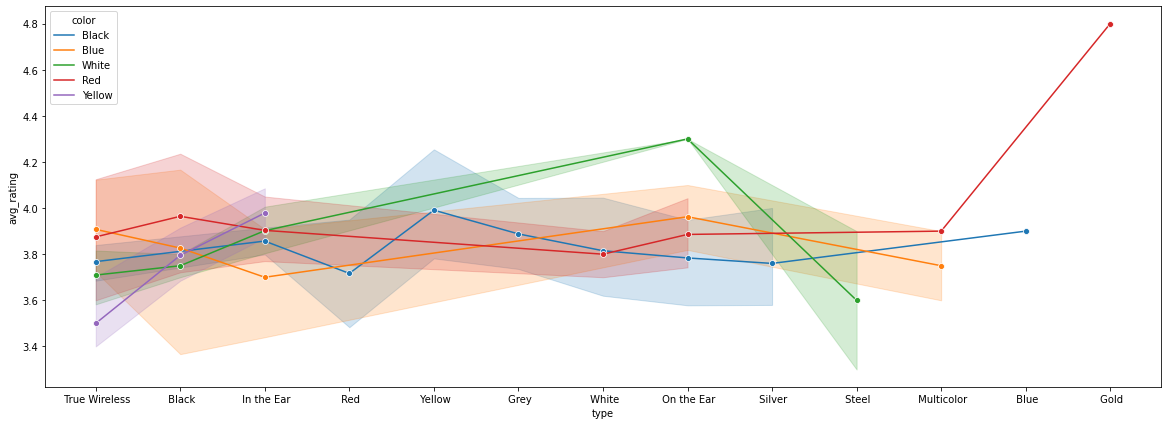

In [13]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_color,x="type",y="avg_rating",marker='o',hue="color")
plt.show()

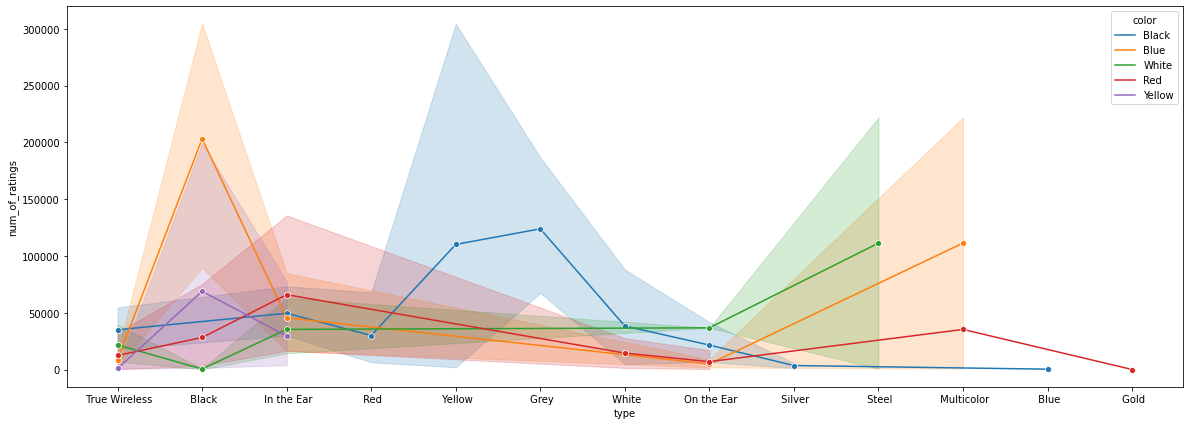

In [14]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_color,x="type",y="num_of_ratings",marker='o',hue="color")
plt.show()

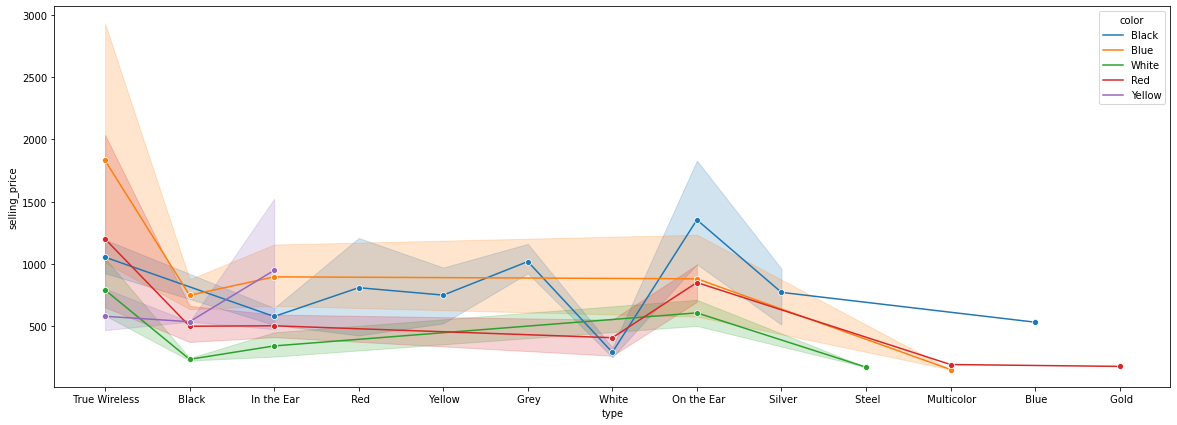

In [15]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_color,x="type",y="selling_price",marker='o',hue="color")
plt.show()

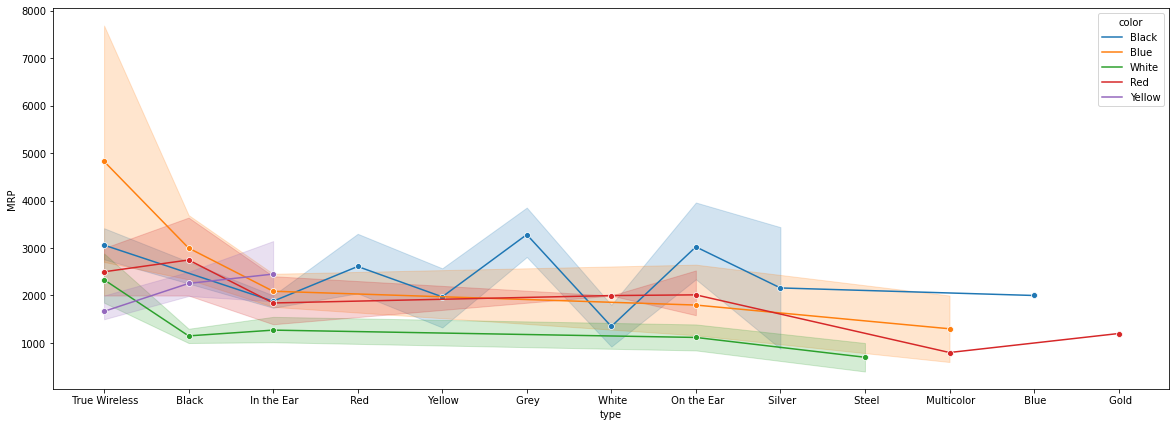

In [16]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_color,x="type",y="MRP",marker='o',hue="color")
plt.show()

In [17]:
# let`s make group by
df_color.groupby(["color","type"]).mean().round(2)

avg_rating  num_of_ratings  selling_price      MRP
color  type                                                              
Black   Blue                 3.90          304.00         529.00  2000.00
        Grey                 3.89       123873.68        1017.00  3283.00
        In the Ear           3.86        49531.45         574.79  1879.17
        On the Ear           3.78        21514.19        1353.11  3024.08
        Red                  3.72        29928.17         806.67  2611.00
        Silver               3.76         3489.20         769.00  2159.00
        True Wireless        3.77        34998.65        1052.19  3061.08
        White                3.82        38284.25         286.35  1348.50
        Yellow               3.99       110129.82         747.09  1971.82
Blue    Black                3.83       203151.00         745.67  2999.00
        In the Ear           3.70        45551.80         894.00  2089.69
        Multicolor           3.75       111342.00         148.00  1299.00
        On the Ear           3.96         4919.31         878.38  1798.56
        True Wireless        3.91         8735.54        1831.00  4825.23
Red     Black                3.96        28189.43         496.43  2747.93
        Gold                 4.80            5.00         173.00  1199.00
        In the Ear           3.90        65864.33         500.07  1842.53
        Multicolor           3.90        35280.00         188.00   799.00
        On the Ear           3.89         6942.14         848.29  2013.29
        True Wireless        3.88        12374.25        1199.00  2499.00
        White                3.80        14469.00         404.00  1998.50
White   Black                3.75          457.00         230.00  1149.00
        In the Ear           3.90        35315.36         337.86  1270.46
        On the Ear           4.30        36720.00         604.00  1116.50
        Steel                3.60       111327.50         167.00   699.00
        True Wireless        3.71        21585.98         788.03  2332.27
Yellow  Black                3.80        68842.70         533.00  2254.00
        In the Ear           3.98        29523.71         946.50  2450.93
        True Wireless        3.50          905.33         576.33  1665.67

# Tha End 